In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.colors as clr


import functions

In [2]:
# download the data
url = 'https://raw.githubusercontent.com/UCHIC/CIWS-VisChallenge/master/2020_Challenge/data/Classified_Events.csv'
df = pd.read_csv(url, error_bad_lines=False)

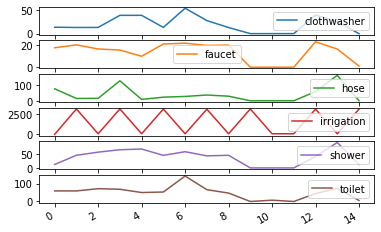

In [3]:
# proprocessing for the data frame to get different kind of data arrangements to use later 
df_use, Accumulated, Accumulated_days_use, Accumulated_hours = functions.summarize_df(df, 'Volume(gal)')

In [4]:
print(Accumulated)

     clothwasher      faucet        hose   irrigation      shower      toilet  \
0       0.000000    0.915618    0.000000      0.00000    0.000000    0.000000   
1       0.000000    1.373427    0.000000      0.00000    0.000000    0.000000   
2       0.000000    1.914474    0.000000      0.00000    0.000000    0.000000   
3       0.000000    1.914474    0.000000      0.00000    0.000000    3.495996   
4       0.000000    2.247426    0.000000      0.00000    0.000000    3.495996   
..           ...         ...         ...          ...         ...         ...   
817   294.412806  204.723861  592.446465  22093.44615  577.172292  749.724666   
818   294.412806  204.723861  592.446465  22093.44615  577.172292  751.888854   
819   294.412806  204.723861  592.446465  22093.44615  589.325040  751.888854   
820   294.412806  205.056813  592.446465  22093.44615  589.325040  751.888854   
821   294.412806  205.223289  592.446465  22093.44615  589.325040  751.888854   

            Total          

In [5]:
print(Accumulated_days_use)

    clothwasher     faucet        hose   irrigation     shower      toilet  \
0     13.817508  17.812932   78.118863     0.000000  12.485700   59.431932   
1     13.276461  20.476548   15.107697  3096.328743  45.822519   59.431932   
2     13.359699  16.689219   15.815220    68.921064  57.101268   72.084108   
3     39.371574  15.731982  130.059375  3102.821307  65.882877   68.671350   
4     39.413193  10.030179    8.948085    69.753444  68.421636   50.442228   
5     13.401318  21.267309   23.473116  3088.337895  45.531186   53.272320   
6     54.770604  22.016451   28.217682    66.964971  58.724409  142.961265   
7     28.051206  19.935501   37.457100  3067.112205  43.658331   66.382305   
8     13.151604  20.268453   29.882442    67.173066  45.739281   47.320803   
9      0.000000   0.000000    0.000000  3096.703314   0.000000    0.000000   
10     0.000000   0.000000    0.000000    70.044777   0.000000    7.408182   
11     0.000000   0.000000    0.000000    69.878301   0.000000  

In [6]:
# define the uses to visualize (uses_plot), in this case I am going to take all indoor uses plus the Total

uses = np.unique(df.Label)
indoor_uses = uses[uses != 'irrigation']

uses_plot = np.append(indoor_uses, 'Total')

days = Accumulated_days_use['Days']

In [7]:
# compute the total given the indoor uses only
Accumulated_days_use['Total'] = Accumulated_days_use[indoor_uses].sum(axis= 1)
Accumulated_hours['Total'] = Accumulated_hours[indoor_uses].sum(axis= 1)
Accumulated['Total'] = Accumulated[indoor_uses].sum(axis= 1)

In [8]:
# Just to have consistency in color across all the plots
colors = plt.cm.Set2(range(len(uses_plot)))


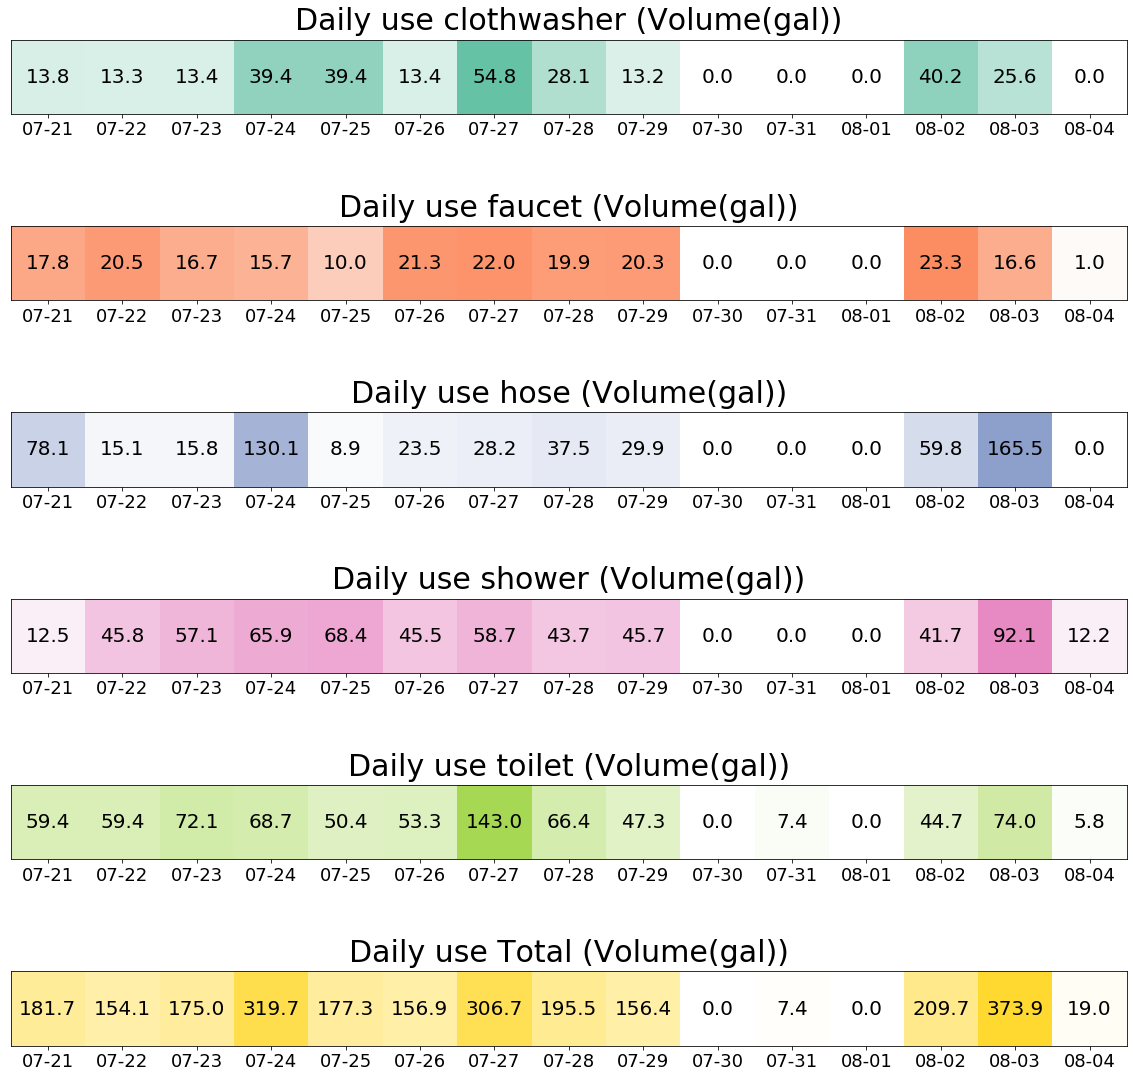

In [9]:
# This function plots the volume use each day by each indoor use
functions.plot_daily_use(Accumulated_days_use, uses_plot)

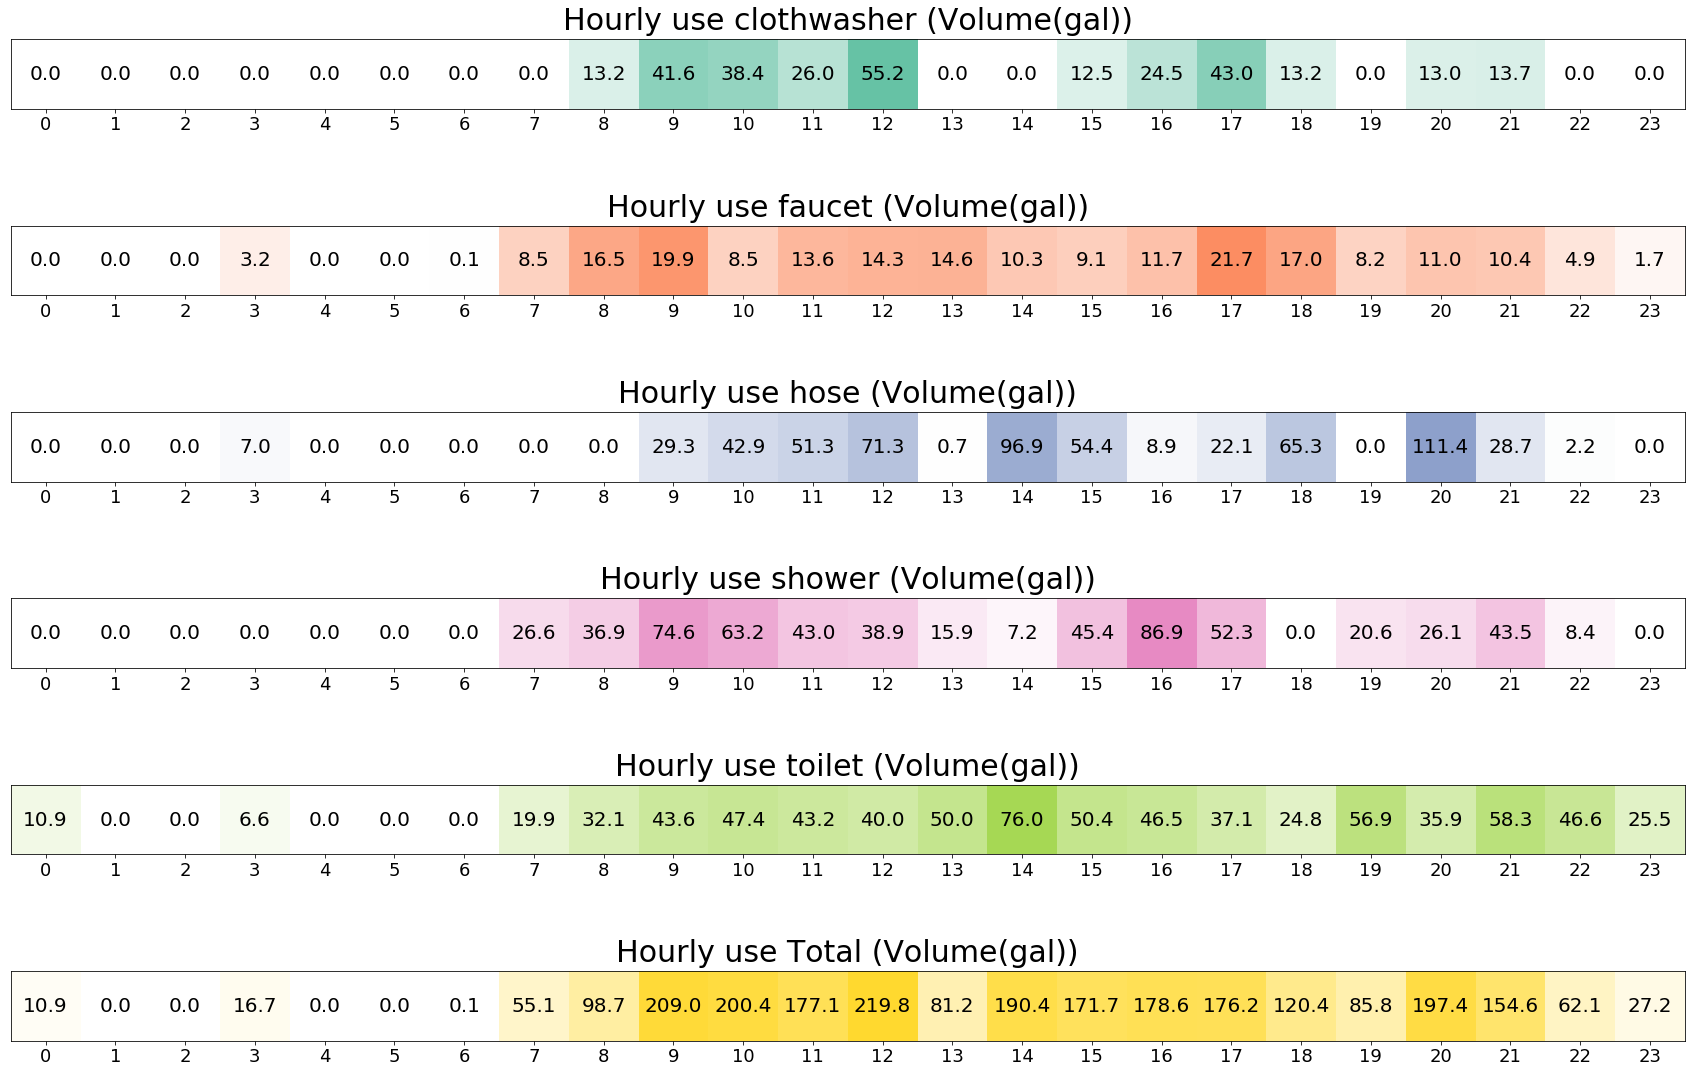

In [10]:
# This function plots the volume use, acuumulating for each hour across the whole data (the sum in each hour for all the days)
functions.plot_hour_use(Accumulated_hours, uses_plot)

In [11]:
Accumulated[Accumulated['Days']=='07-31']

,clothwasher,faucet,hose,irrigation,shower,toilet,Total,Dates,Days
660,228.613167,164.228574,367.07958,15794.160786,443.367207,619.998243,1823.286771,2020-07-31 04:44:00,07-31
661,228.613167,164.228574,367.07958,15794.160786,443.367207,622.204050,1825.492578,2020-07-31 11:06:00,07-31
662,228.613167,164.228574,367.07958,15794.160786,443.367207,624.451476,1827.740004,2020-07-31 11:07:00,07-31
663,228.613167,164.228574,367.07958,15794.160786,443.367207,627.406425,1830.694953,2020-07-31 12:07:00,07-31


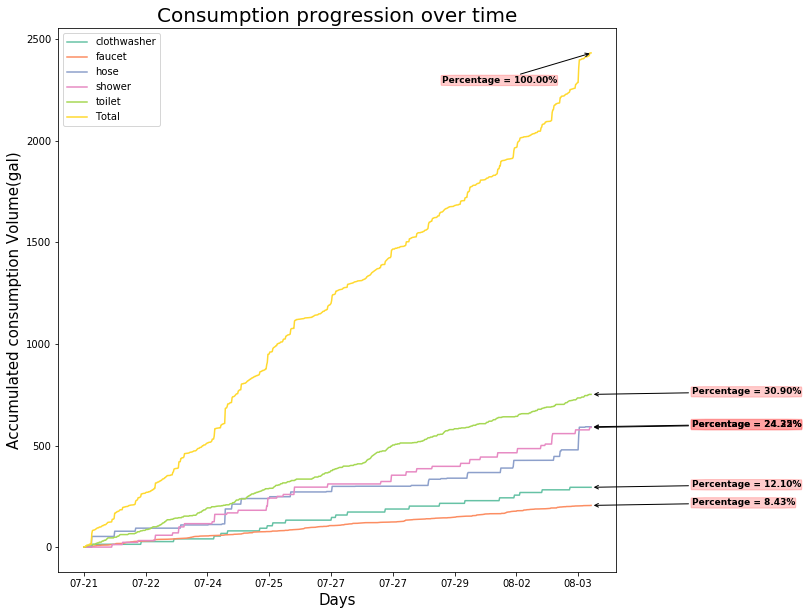

In [12]:
# This shows how the Volume use is increasing across time, and the percentage of each use at the end of the period
functions.plot_accumulated_use(Accumulated, uses_plot)

<Figure size 432x288 with 0 Axes>

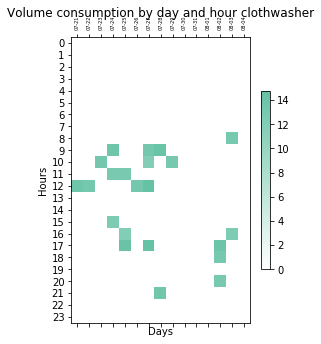

<Figure size 432x288 with 0 Axes>

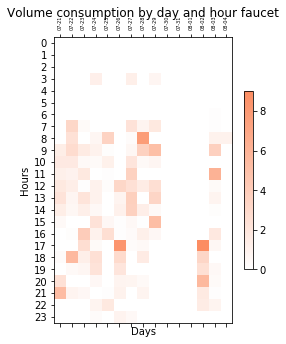

<Figure size 432x288 with 0 Axes>

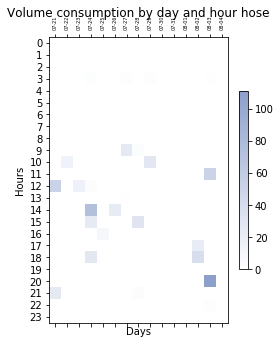

<Figure size 432x288 with 0 Axes>

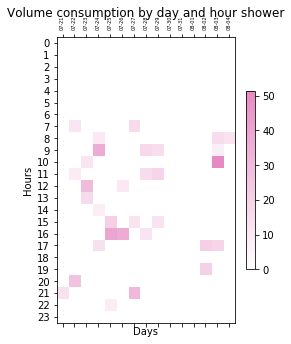

<Figure size 432x288 with 0 Axes>

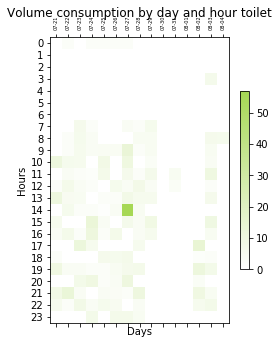

<Figure size 432x288 with 0 Axes>

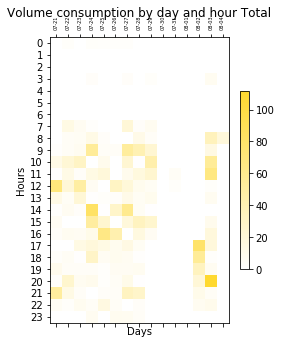

In [13]:
# This combines hours and days, to have a closer look in consumption, and possibly visualize some patterns in hours or days
df_use['Total'] = df_use[indoor_uses].sum(axis= 1)
colors = plt.cm.Set2(range(len(uses_plot))) 
for k in range(len(uses_plot)):
    colorm = colors[k]
    functions.day_hour_use(df_use, uses_plot[k], colorm)

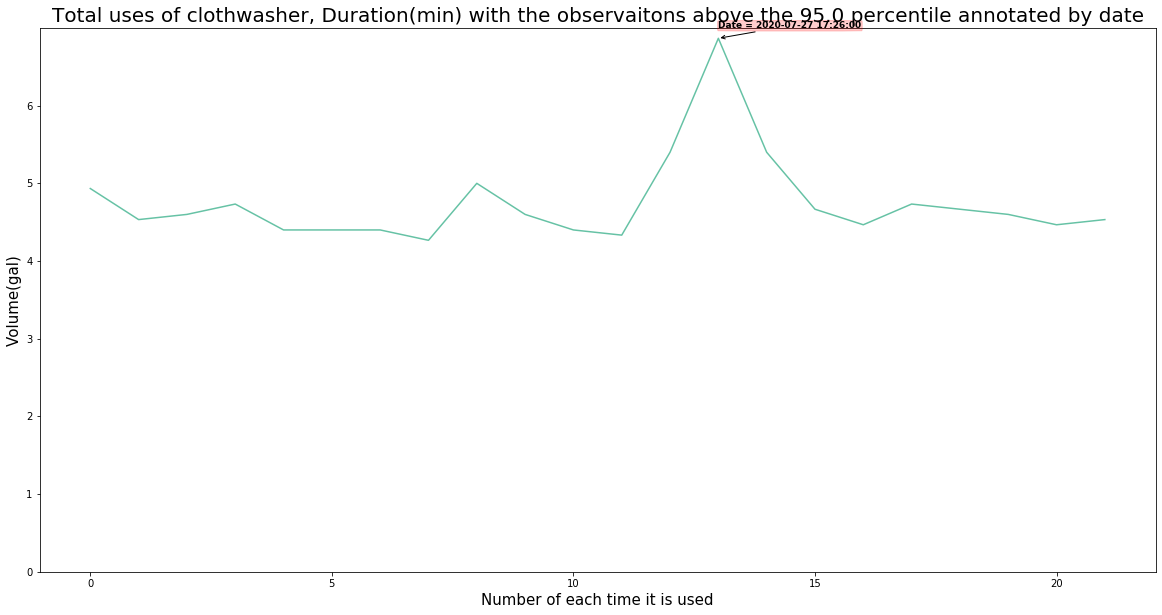

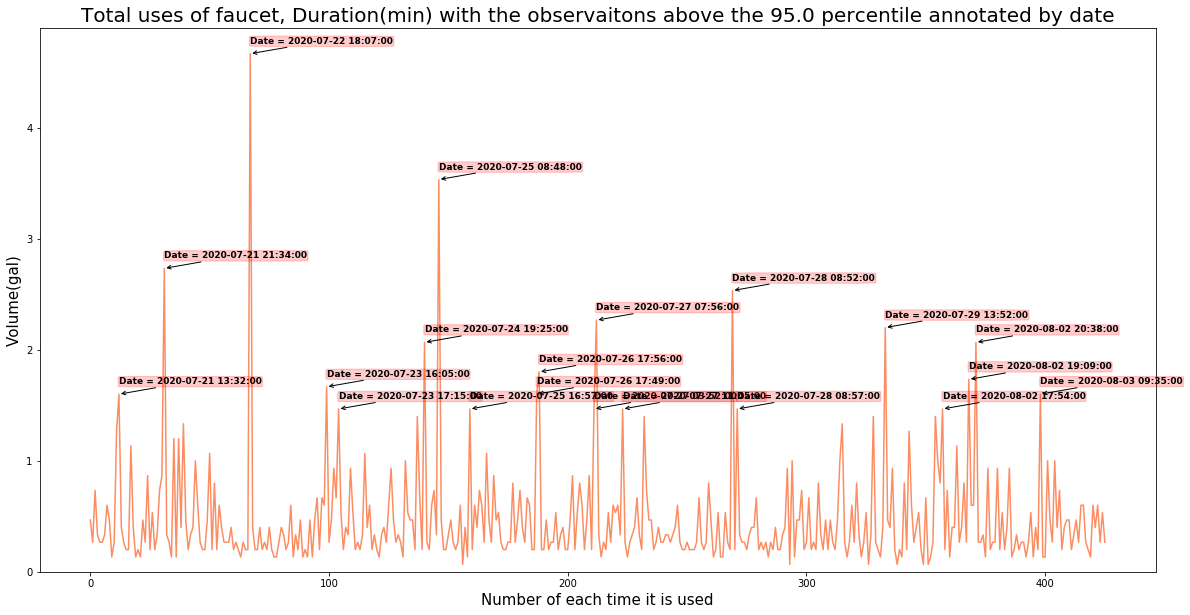

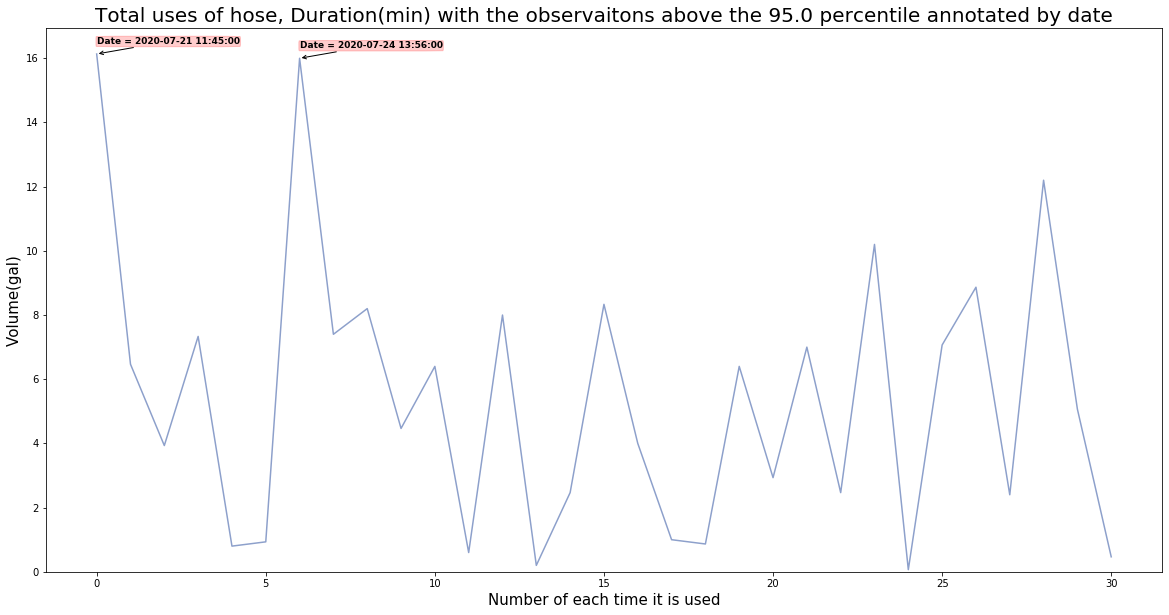

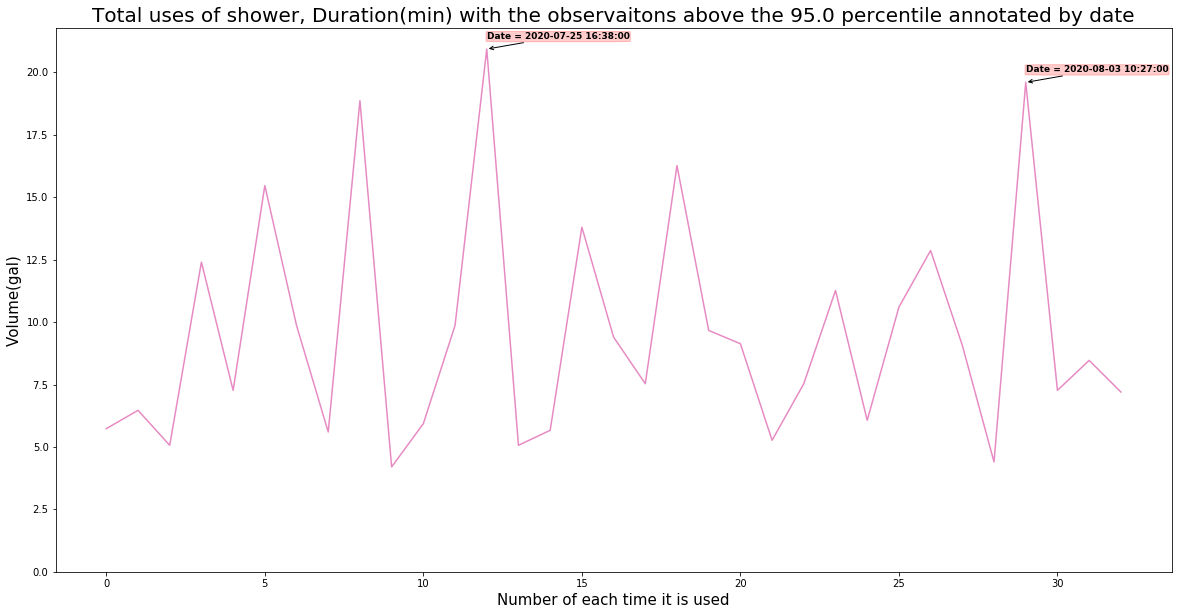

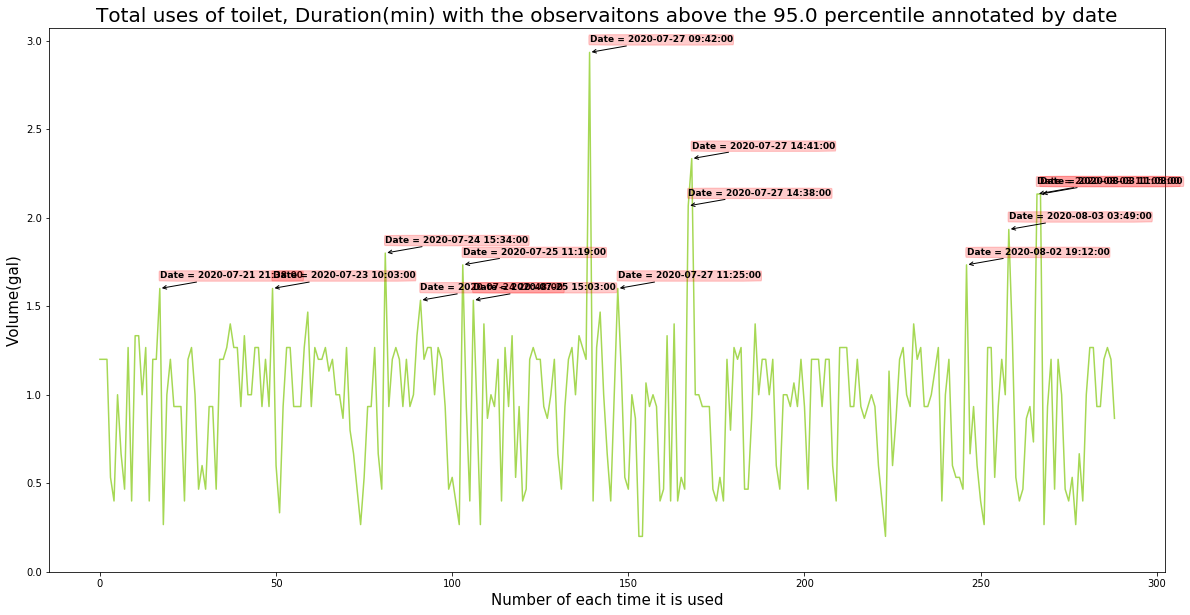

In [14]:
### Now we can see all the observations by a given feature with anomaly behavior annotaded

# Let's try is with Duration
colors = plt.cm.Set2(range(len(uses_plot))) 
feature = 'Duration(min)'
for k in range(len(indoor_uses)):
    colorm = colors[k]
    functions.plot_feature_use(df, indoor_uses[k], 0.95, colorm, feature)



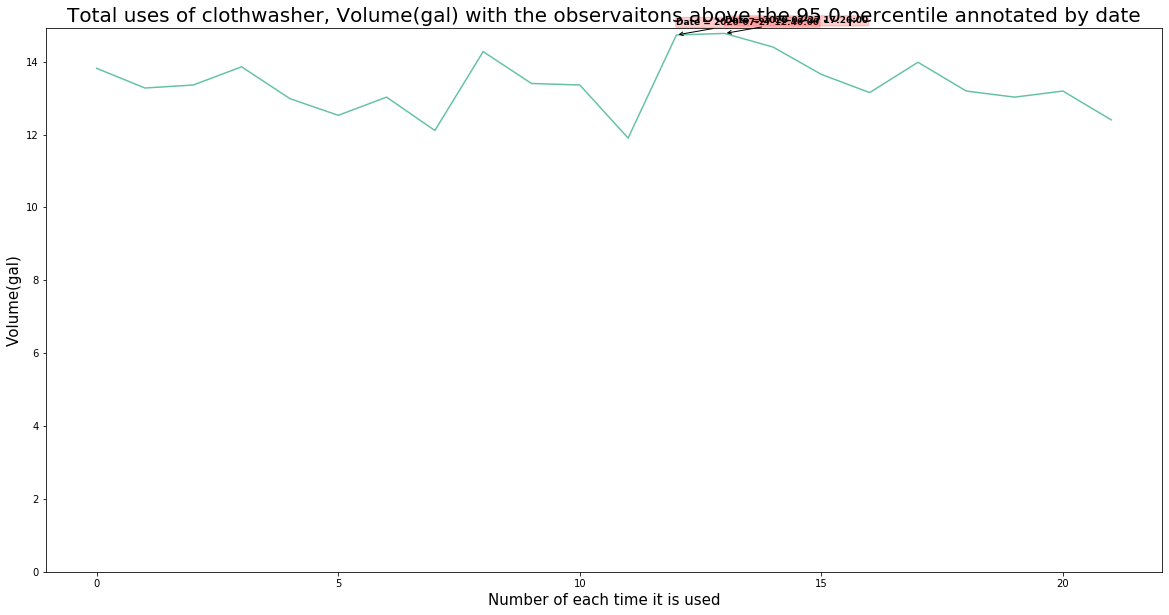

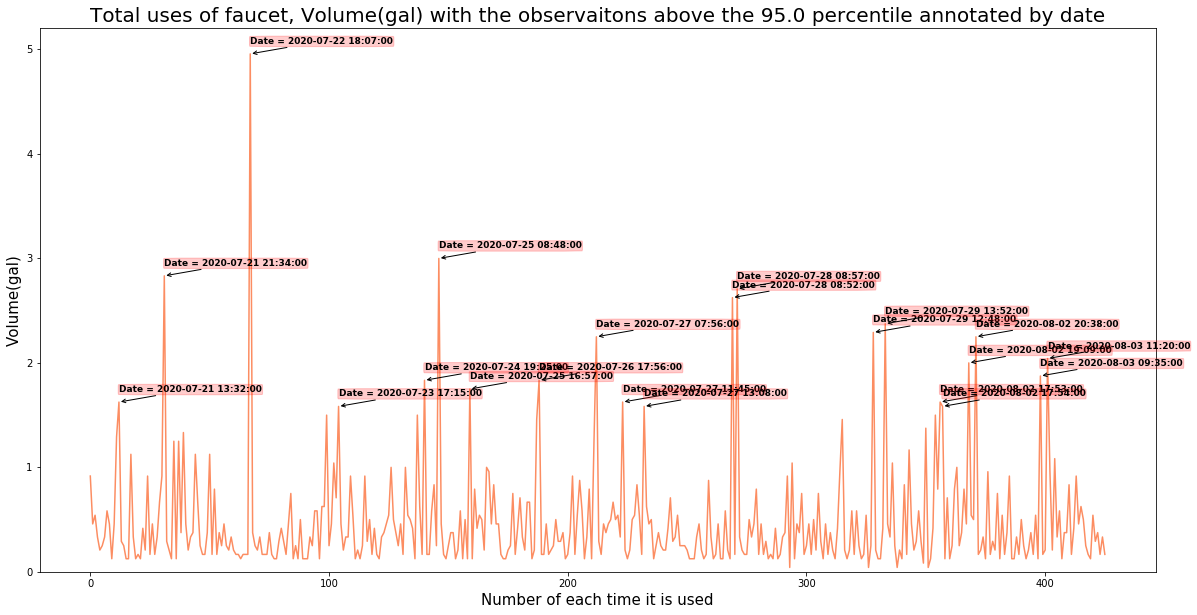

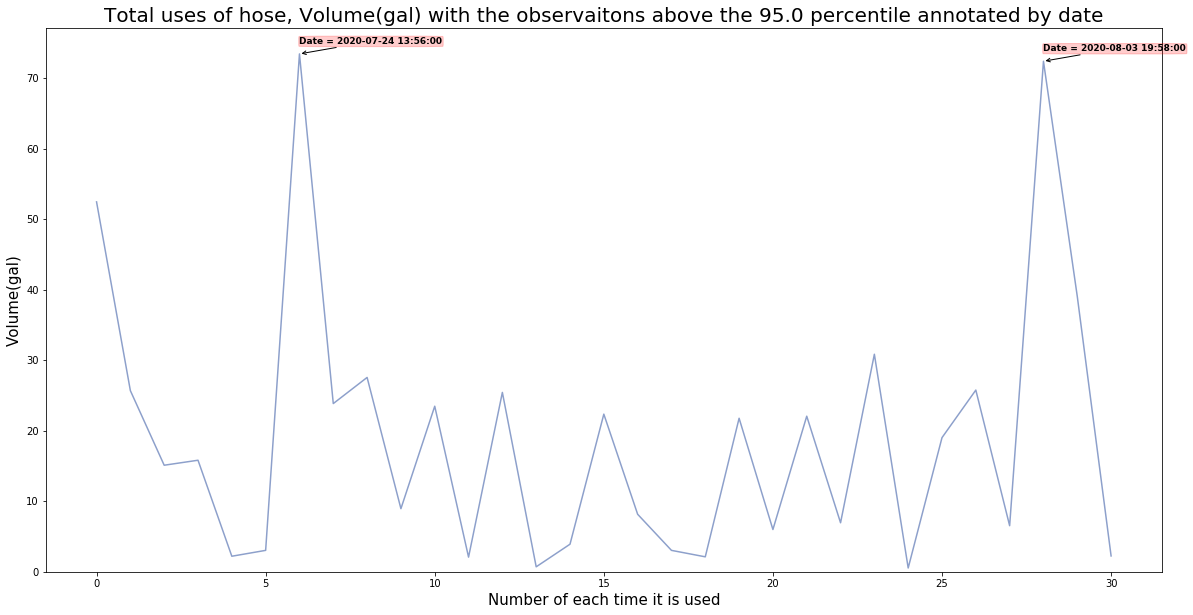

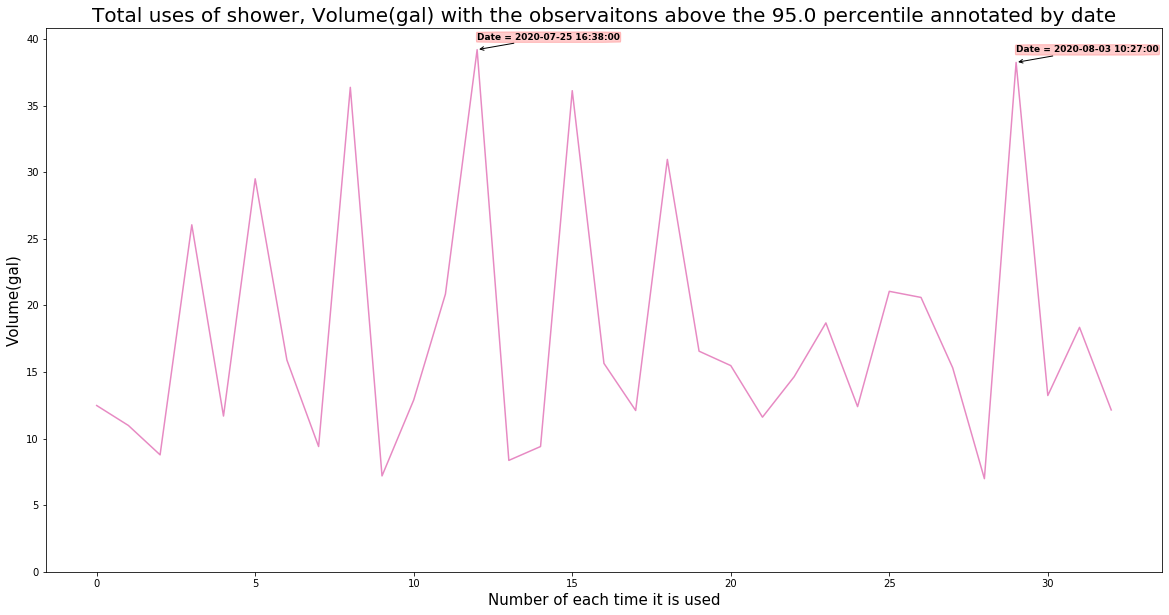

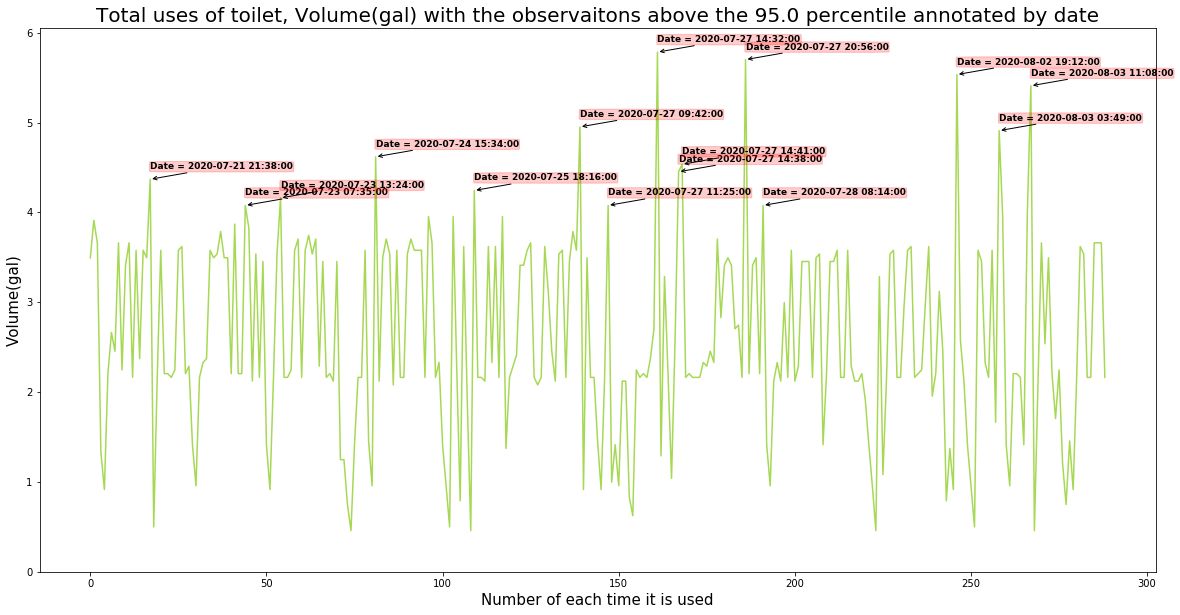

In [15]:
# Now with volume 
colors = plt.cm.Set2(range(len(uses_plot))) 
feature = 'Volume(gal)'
for k in range(len(indoor_uses)):
    colorm = colors[k]
    functions.plot_feature_use(df, indoor_uses[k], 0.95, colorm, feature)

### TAKE AWAYS
- There is a lack of shower observations, there should be more.
- There was a couple of hose uses greater than usual.
- The clothwasher is pretty stable in its consumption.
- there are two different uses of the shower, might be different people or a different shower.
- Most of the showers are taken at 9am, 10am and 4pm.
- There is no clear daily cyclical pattern for indoor_uses, although looking at the hours there are some moments of the day with more use.

In [17]:
percentage_uses = Accumulated_days_use
percentage_uses[indoor_uses] = (Accumulated_days_use[indoor_uses].div(Accumulated_days_use['Total'], axis='rows')).fillna(0)

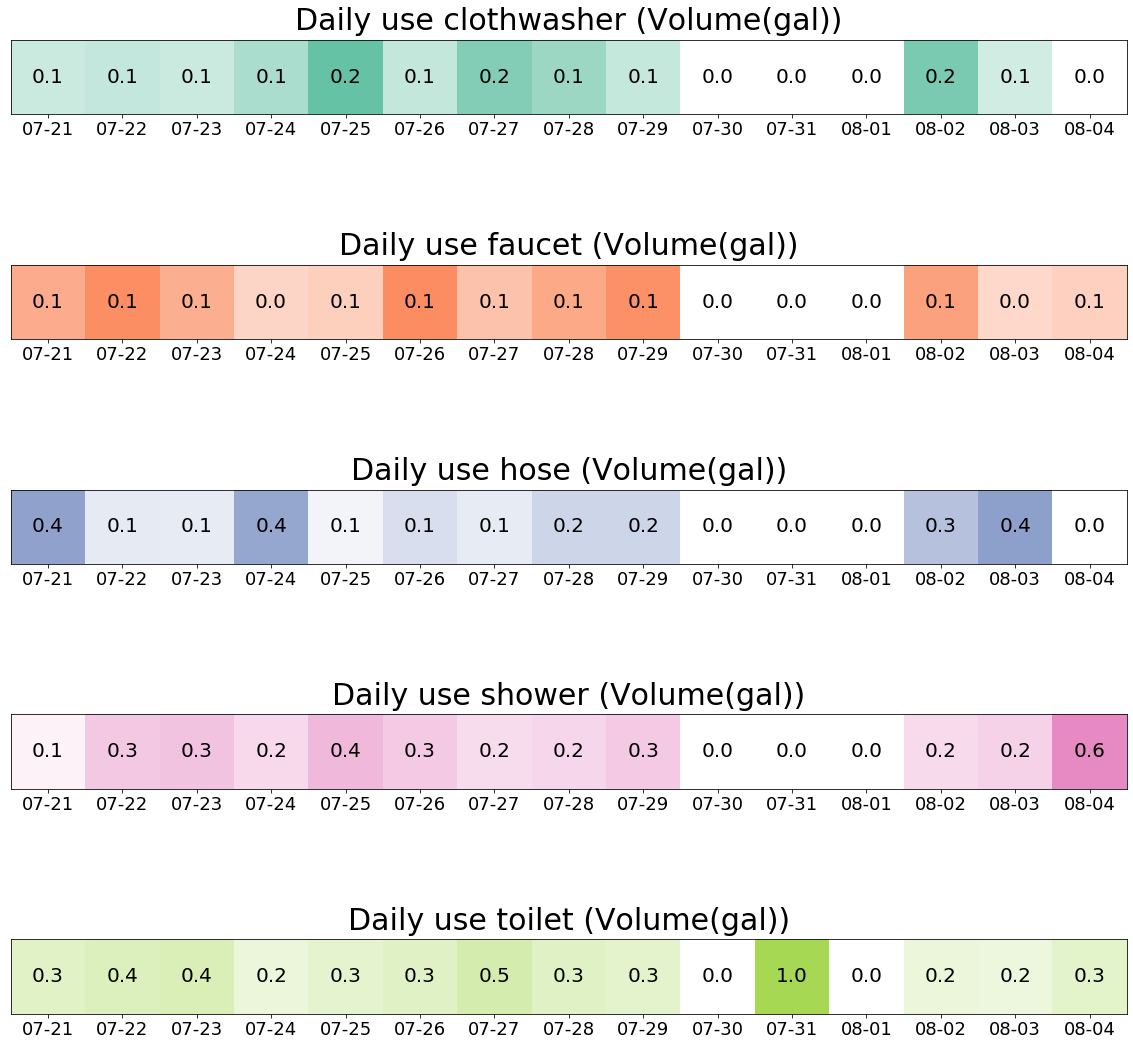

In [18]:
functions.plot_daily_use(percentage_uses, indoor_uses)

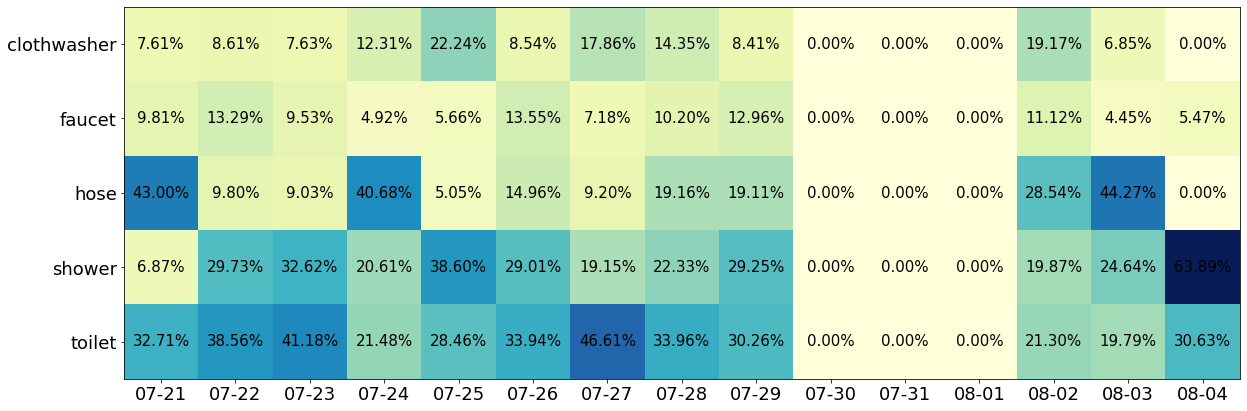

In [20]:
# Remove a day where toilet had 100% to visualize better
percentage_uses.loc[percentage_uses['toilet'] == 0, 'toilet'] = 0

cm = plt.cm.YlGnBu
fig, ax = plt.subplots(1,1, figsize = (20,20))
days = percentage_uses['Days']
ax.matshow(np.array(percentage_uses[indoor_uses]).transpose(), cmap = cm)
ax.set_xticks(range(len(days)))
ax.set_yticks(range(len(indoor_uses)))
ax.set_xticklabels(days, fontsize=18)
ax.set_yticklabels(list(indoor_uses),  fontsize=18)
ax.xaxis.set_ticks_position('bottom')

for (i, j), z in np.ndenumerate(np.array(percentage_uses[indoor_uses]).transpose()):
    ax.text(j, i, '{:0.2%}'.format(z), ha='center', va='center',
               fontsize=15)

#     ax.set_title("Hourly use {} (Volume(gal))".format(uses), fontsize=30)   